In [256]:
# IV for a double dot

import numpy as np
import imp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.expanduser('~/quantum-ml/nanowire_model'))

import potential_profile
import markov
imp.reload(markov)
import thomas_fermi
imp.reload(thomas_fermi)
import tunneling
imp.reload(tunneling)
import exceptions

def get_dot_current_and_charge(physics_model,graph_model,tf_strategy):
    
    try:
        graph = markov.Markov(graph_model,physics_model,tf_strategy)
        graph.generate_graph()

        current = graph.get_current()
        charge_state = graph.get_charge_state()

        del graph
    except exceptions.InvalidChargeState:
        current = 0
        # no dot
        charge_state = (0,0)
    
    return current,charge_state

1.18802238465e-16 (22,)


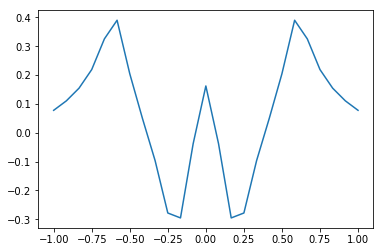

In [258]:
# physical parameters
E_scale = 'eV'
dx_scale = '1e-9'

kT = 1500e-6
b1 = (-200e-3,-0.6,0.05,1)
d1 = (250e-3,-0.2,0.05,1)
b2 = (-250e-3,0.0,0.05,1)
d2 = (250e-3,0.2,0.05,1)
b3 = (-200e-3,0.6,0.05,1)

x = np.linspace(-1,1,25)
V = potential_profile.V_x_wire(x,[b1,b2,b3,d1,d2])

K_onsite = 10e-3
sigma = x[1] - x[0]
x_0 = 0.1*(x[1] - x[0])
mu_l = (200.0e-3,200.1e-3)
battery_weight = 1000

physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

# graph parameters
graph_model = (5,1)

tf_strategy = 'simple'

plt.plot(x,V)


I,charge_state = get_dot_current_and_charge(physics_model,graph_model,tf_strategy)
print(I,charge_state)

In [259]:
N_v = 50
V_d_vec = np.linspace(170e-3,250e-3,N_v)
I_vec = np.zeros((N_v,N_v))
charge_state_vec = []

for i in range(N_v):
    print(i)
    charge_state_row = []
    for j in range(N_v):
        #print("j",j)
        b1 = (-200e-3,-0.6,0.05,1)
        d1 = (V_d_vec[i],-0.2,0.05,1)
        b2 = (-250e-3,0.0,0.05,1)
        d2 = (V_d_vec[j],0.2,0.05,1)
        b3 = (-200e-3,0.6,0.05,1)

        V = potential_profile.V_x_wire(x,[b1,b2,b3,d1,d2])
        
        physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)
        I,charge_state = get_dot_current_and_charge(physics_model,graph_model,tf_strategy)
        I_vec[i,j] = I
        charge_state_row += [charge_state]
    charge_state_vec += [charge_state_row]
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


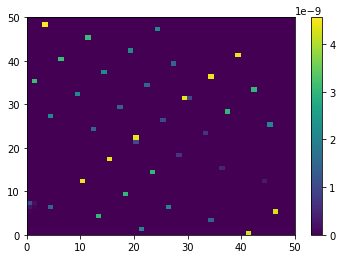

In [265]:
plt.pcolor(I_vec[:,:],vmin = 0)
plt.colorbar()

In [261]:
cs = np.array(charge_state_vec)

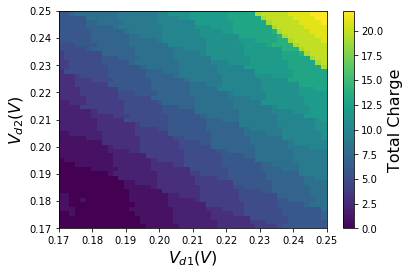

In [263]:
size = 50
d1_charge = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        d1_charge[i,j] = cs[i,j][0]
d2_charge = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        try:
            d2_charge[i,j] = cs[i,j][1]
        except IndexError:
            d2_charge[i,j] = 0
XX,YY = np.meshgrid(V_d_vec,V_d_vec)
plt.pcolor(XX,YY,d1_charge + d2_charge)
cbar = plt.colorbar()
plt.xlabel(r'$V_{d1} (V)$',fontsize=16)
plt.ylabel(r'$V_{d2} (V)$',fontsize=16)
cbar.set_label('Total Charge',fontsize=16)

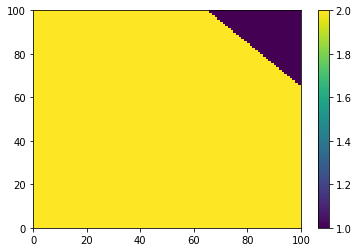

In [232]:
size = 100
dot_size = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        dot_size[i,j] = len(cs[i,j])
plt.pcolor(dot_size)
plt.colorbar()


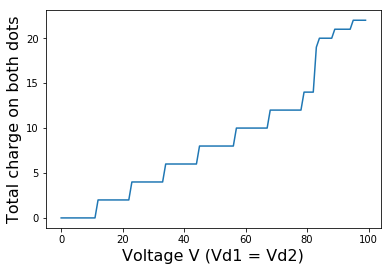

In [247]:
trace = np.zeros(cs.shape[0])
for i in range(cs.shape[0]):
    trace[i] = np.sum(np.array(cs[i,i]))
    
plt.plot(trace)
plt.xlabel('Voltage V (Vd1 = Vd2)',fontsize=16) 
plt.ylabel('Total charge on both dots',fontsize=16)

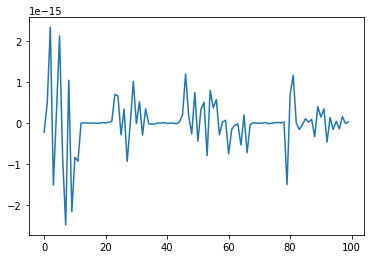

In [238]:
trace_I = np.zeros(I_vec.shape[0])
for i in range(cs.shape[0]):
    trace_I[i] = np.sum(np.array(I_vec[i,i]))
plt.plot(trace_I)

In [236]:
data = []
data += [{'V_grid' : np.meshgrid(V_d_vec,V_d_vec),'I' : I_vec,'CS' : charge_state_vec }]

In [237]:
np.save('/Users/sandesh/quantum-ml/data/double_dot_100.npy',data)

In [188]:
dat = np.load('/Users/sandesh/quantum-ml/data/double_dot.npy')

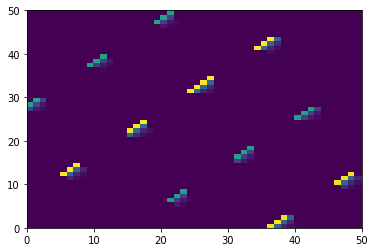

In [193]:
plt.pcolor(dat[0]['I'])